In [31]:
#Import Packages
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#problem we want to predict the 6th value of a sequence

In [32]:
#Generate 100 vectors of length 5 consecutive digits ( 0,1,2,3,4) (1,2,3,4,5) (2,3,4,5,6)...
#We also standradize by dividing by 100
X = [[[(i+j)/100] for i in range(5)] for j in range(100)]
X = np.array(X, dtype=float)

# we want to predict the 6th consecutive digit, so we create the test dataset to compare with our predictions
y = [(i+5)/100 for i in range(100)]
y = np.array(y, dtype=float)
#both are converted into 2D numpy arrays because RNNs dont take 3D vectors

In [33]:
#split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=5,test_size=0.3)

In [34]:
#LSTM
model = Sequential()  
model.add(LSTM(units=1, batch_input_shape=(None, 5, 1),return_sequences=False))
#output size is equal to 1 since we want 1 output
#Input: the shape each recurrent neuron will take. We choose none because we dont know the size of our input data, and 
# 5 is the length of our input sequence ( 5 digits) and 1 since each vector is 1x1 
# we specify return sequences to false to return only 1 output at the last node
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [35]:
#fit the model on training data
fit=model.fit(X_train, y_train, epochs=50, batch_size=1,validation_data=(X_test, y_test))
predict = model.predict(X_test)
# epochs is the number of times the learninjg algorithm will go through the entire training set
# each epoch is made of 1 or more batches
#so in our case we are dividing our dataset into 100 batches each with 1 sample

Epoch 1/50
70/70 [==============================] - 1s 8ms/step - loss: 0.5978 - accuracy: 0.0000e+00 - val_loss: 0.5044 - val_accuracy: 0.0000e+00
Epoch 2/50
70/70 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.0000e+00 - val_loss: 0.4211 - val_accuracy: 0.0000e+00
Epoch 3/50
70/70 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.0000e+00 - val_loss: 0.3627 - val_accuracy: 0.0000e+00
Epoch 4/50
70/70 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.0000e+00 - val_loss: 0.3203 - val_accuracy: 0.0000e+00
Epoch 5/50
70/70 [==============================] - 0s 3ms/step - loss: 0.3832 - accuracy: 0.0000e+00 - val_loss: 0.2885 - val_accuracy: 0.0000e+00
Epoch 6/50
70/70 [==============================] - 0s 2ms/step - loss: 0.3597 - accuracy: 0.0000e+00 - val_loss: 0.2639 - val_accuracy: 0.0000e+00
Epoch 7/50
70/70 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.0000e+00 - val_loss

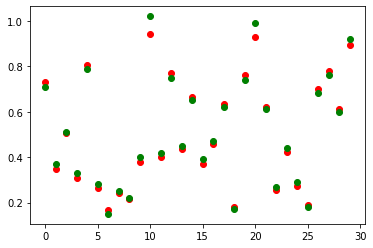

In [36]:
#We plot the predicted values vs the test values
plt.scatter(range(30),predict,c='r')
plt.scatter(range(30),y_test,c='g')
plt.show()

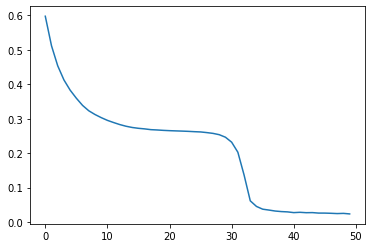

In [37]:
plt.plot(fit.history['loss'])

In [38]:
#As seen from the loss plot, the model can be improved
#we can try inscreasing epocs to get more accurate results
#here we increased number of epochs to 500, and it became more accurate
fit2=model.fit(X_train, y_train, epochs=500, batch_size=1,validation_data=(X_test, y_test))
predict2 = model.predict(X_test)

Epoch 1/500
70/70 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.0143 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 2/500
70/70 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.0143 - val_loss: 0.0205 - val_accuracy: 0.0000e+00
Epoch 3/500
70/70 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.0143 - val_loss: 0.0196 - val_accuracy: 0.0000e+00
Epoch 4/500
70/70 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.0143 - val_loss: 0.0188 - val_accuracy: 0.0000e+00
Epoch 5/500
70/70 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.0143 - val_loss: 0.0209 - val_accuracy: 0.0000e+00
Epoch 6/500
70/70 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.0143 - val_loss: 0.0179 - val_accuracy: 0.0000e+00
Epoch 7/500
70/70 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.0143 - val_loss: 0.0231 - val_accura

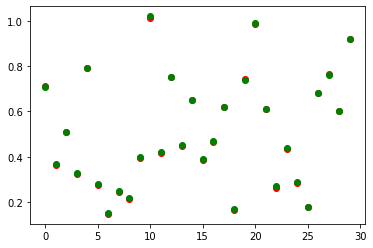

In [39]:
plt.scatter(range(30),predict2,c='r')
plt.scatter(range(30),y_test,c='g')
plt.show()

In [40]:
#GRU: Very similar process
model = Sequential()  
model.add(GRU(1, batch_input_shape=(None, 5, 1),return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])
model.summary()
fit3=model.fit(X_train, y_train, epochs=500, batch_size=1,validation_data=(X_test, y_test))
predict3 = model.predict(X_test)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 1)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
70/70 [==============================] - 0s 7ms/step - loss: 0.5159 - accuracy: 0.0000e+00 - val_loss: 0.4221 - val_accuracy: 0.0000e+00
Epoch 2/500
70/70 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.0000e+00 - val_loss: 0.3188 - val_accuracy: 0.0000e+00
Epoch 3/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3418 - accuracy: 0.0000e+00 - val_loss: 0.2362 - val_accuracy: 0.0000e+00
Epoch 4/500
70/70 [==============================] - 0s 3ms/step - loss: 

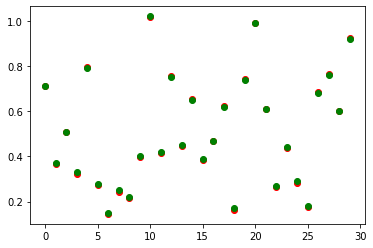

In [41]:
plt.scatter(range(30),predict3,c='r')
plt.scatter(range(30),y_test,c='g')
plt.show()